In [418]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [419]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados_completo = pd.read_json('TelecomX_Data.json')

# Criação da nova coluna ChargesDaily

In [420]:
dados_completo['ChargesDaily'] = round(dados_completo['ChargesMonthly'] / 30, 2)

# Análise total de planos cancelados

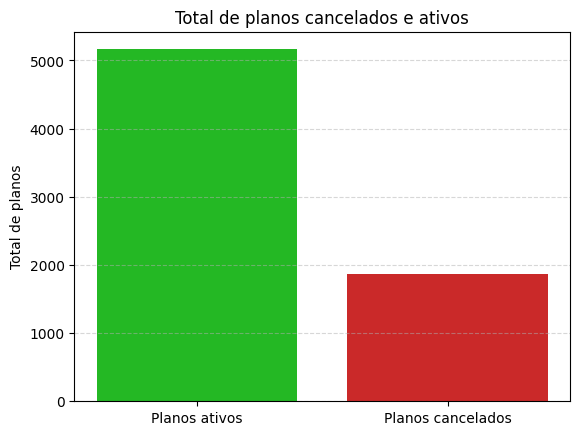

In [421]:
percentul_churn = dados_completo['Churn'].value_counts()

plt.bar(height=percentul_churn, x=['Planos ativos', 'Planos cancelados'], color=['#24B824', '#CA2929'])
plt.grid(linestyle="--", axis='y', alpha=0.5)
plt.title('Total de planos cancelados e ativos')
plt.ylabel('Total de planos')
plt.show()

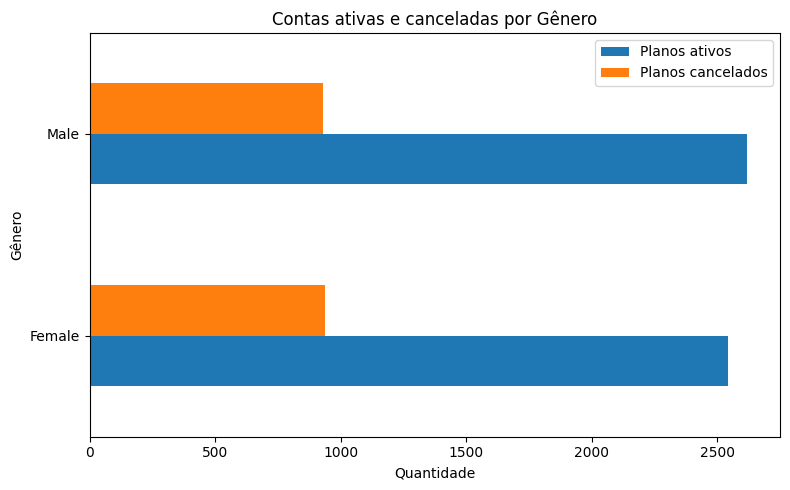

In [422]:
data = dados_completo.groupby(['gender', 'Churn']).size().unstack()

data.plot(kind='barh', figsize=(8,5))

plt.title('Contas ativas e canceladas por Gênero')
plt.xlabel('Quantidade')
plt.ylabel('Gênero')
plt.legend(title='', labels=['Planos ativos', 'Planos cancelados'] )
plt.tight_layout()
plt.show()

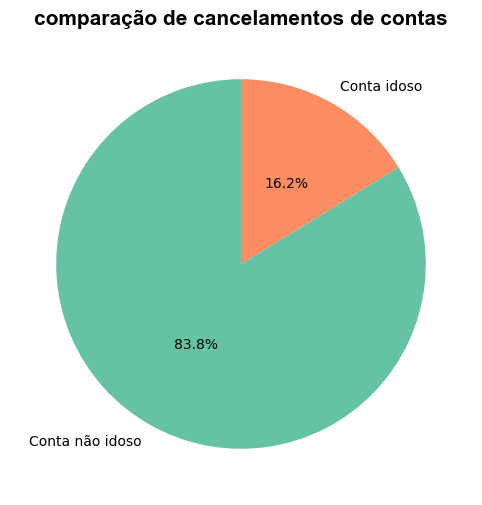

In [423]:
df_SeniorCitizen_counts = dados_completo['SeniorCitizen'].value_counts(normalize=True)

custom_labels = ['Conta não idoso','Conta idoso']

fig, ax = plt.subplots(figsize=(8, 6))
pie_colors = ['#66c2a5', '#fc8d62']
ax.pie(df_SeniorCitizen_counts,
        labels=custom_labels,
        autopct='%1.1f%%', startangle=90, # Opcional: começa o primeiro slice no topo
        pctdistance=0.5, # Distância das porcentagens do centro (0 a 1)
        labeldistance=1.1, # Distância dos rótulos das categorias do centro (0 a 1)
        colors=pie_colors)
plt.title('comparação de cancelamentos de contas', fontdict={'fontsize': 15, 'fontname': 'Arial'}, fontweight='bold')
plt.show()


In [424]:
df_idosos = dados_completo[dados_completo['SeniorCitizen']==True]
df_churn_senior_citizen_pie = df_idosos.groupby(dados_completo['SeniorCitizen'])['Churn'].value_counts(normalize=True)

In [425]:
custom_labels_idosos = ['Idoso com conta ativa', 'Idoso com conta cancelada']

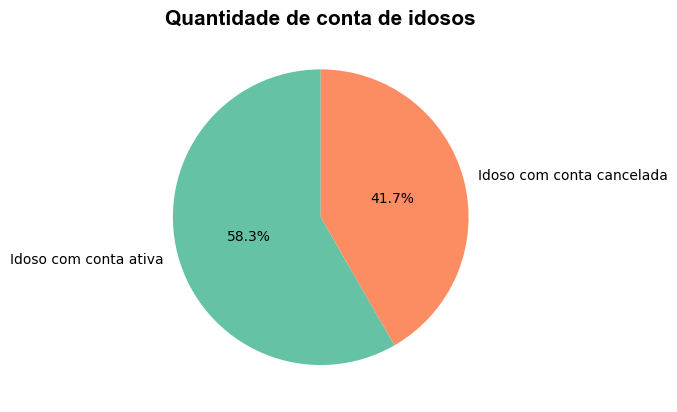

In [426]:
fig, ax = plt.subplots()
pie_colors = ['#66c2a5', '#fc8d62']
ax.pie(df_churn_senior_citizen_pie,
        labels=custom_labels_idosos,
        autopct='%1.1f%%', startangle=90, # Opcional: começa o primeiro slice no topo
        pctdistance=0.5, # Distância das porcentagens do centro (0 a 1)
        labeldistance=1.1, # Distância dos rótulos das categorias do centro (0 a 1)
        colors=pie_colors)
plt.title('Quantidade de conta de idosos', fontdict={'fontsize': 15, 'fontname': 'Arial'}, fontweight='bold')
plt.show()

In [427]:
churn_counts_gender = dados_completo.groupby('gender')['Churn'].value_counts()

# utilizar para plotar gráfico

In [428]:
# Criando variáveis dos quantis da coluna de gastos mensais
q1 = dados_completo['ChargesMonthly'].quantile(q=0.25)
q2 = dados_completo['ChargesMonthly'].quantile(q=0.5)
q3 = dados_completo['ChargesMonthly'].quantile(q=0.75)


In [429]:
charges_monthly_q1 = dados_completo.query('ChargesMonthly < @q1')
charges_monthly_q2 = dados_completo.query('ChargesMonthly < @q2')
charges_monthly_q3 = dados_completo.query('ChargesMonthly < @q3')
charges_monthly_q4 = dados_completo.query('ChargesMonthly > @q3')
charges_monthly_teste = dados_completo.query('ChargesMonthly < 50')

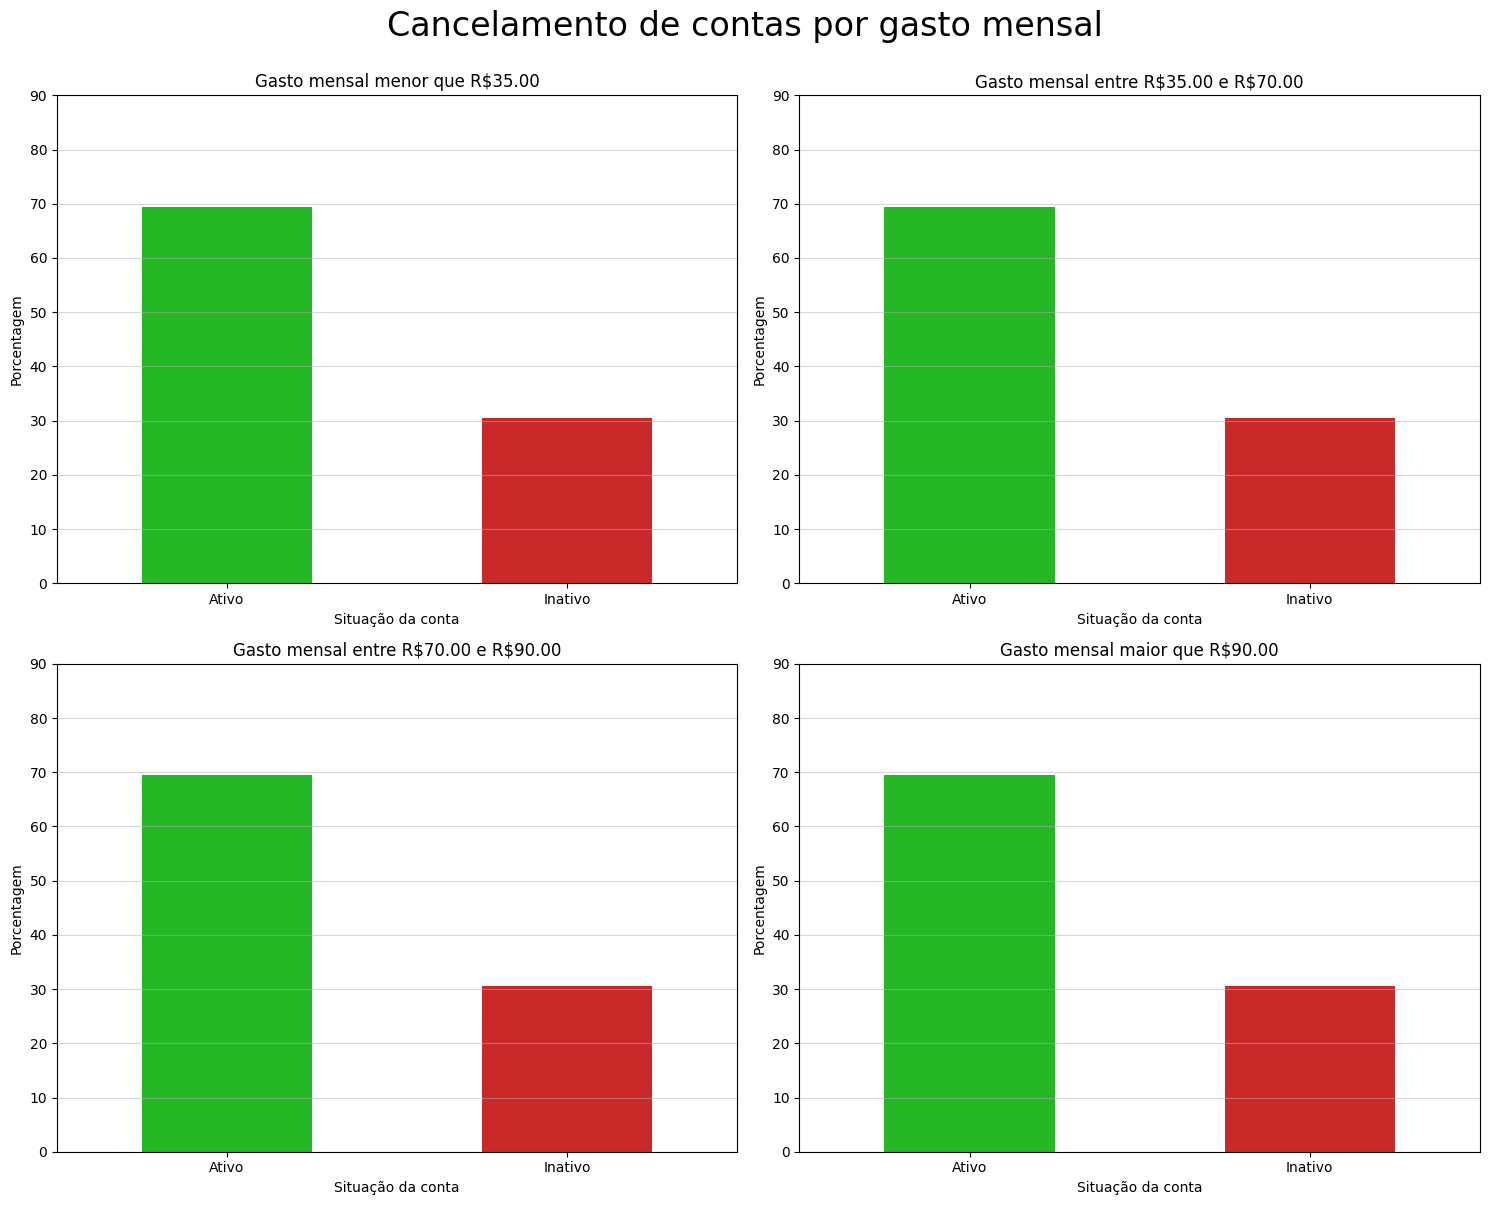

In [430]:

quantis = {
    'Gasto mensal menor que R\\$35.00': charges_monthly_q1,
    'Gasto mensal entre R\\$35.00 e R\\$70.00': charges_monthly_q2,
    'Gasto mensal entre R\\$70.00 e R\\$90.00': charges_monthly_q3,
    'Gasto mensal maior que R\\$90.00': charges_monthly_q4
}

posicoes = {
    'Gasto mensal menor que R\\$35.00': (0, 0),
    'Gasto mensal entre R\\$35.00 e R\\$70.00': (0, 1),
    'Gasto mensal entre R\\$70.00 e R\\$90.00': (1, 0),
    'Gasto mensal maior que R\\$90.00': (1, 1)
}

custom_labels_charge = ['Ativo', 'Inativo']
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Cancelamento de contas por gasto mensal', fontsize=24, y=1)

for nome, df in quantis.items():
    pos = posicoes[nome]
    soma_por_churn = dados_completo.groupby('Churn')['ChargesMonthly'].sum()
    percentul_churn = soma_por_churn / soma_por_churn.sum() * 100
    # percentul_churn = percentul_churn.round(2)
    percentul_churn.plot(
        kind='bar',
        ax=axs[pos[0], pos[1]],
        color=["#24B824", "#CA2929"]
    )
    axs[pos[0], pos[1]].set_title(nome)
    axs[pos[0], pos[1]].set_xticklabels(custom_labels_charge, rotation=0)
    axs[pos[0], pos[1]].set_xlabel('Situação da conta')
    axs[pos[0], pos[1]].set_ylabel('Porcentagem')
    axs[pos[0], pos[1]].grid(visible=True, alpha=0.5, axis='y')
    axs[pos[0], pos[1]].set_ylim(0, 90)
    

plt.tight_layout()
plt.show()




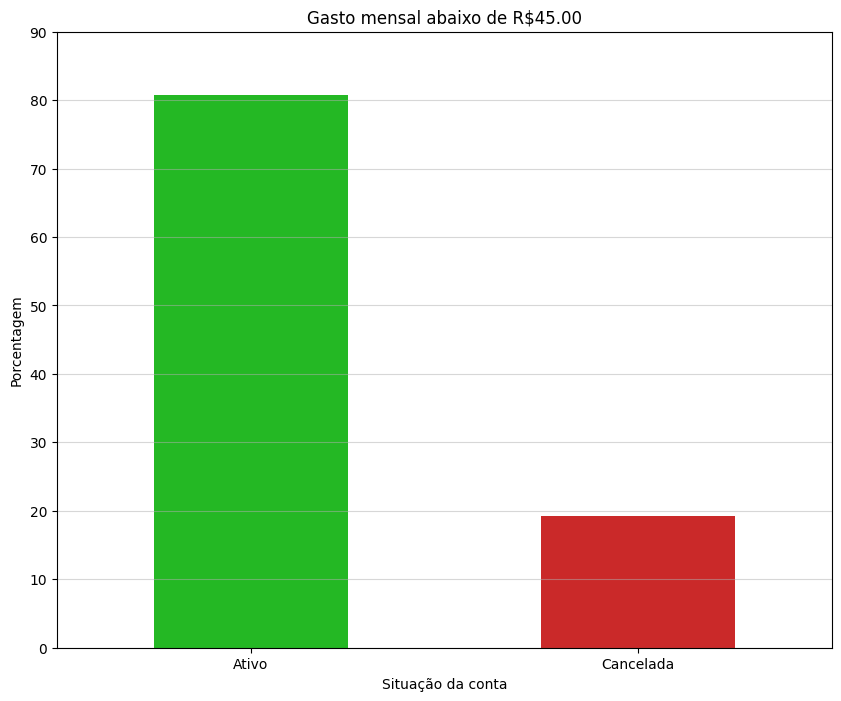

In [431]:
custom_labels_charge = ['Ativo', 'Cancelada']

soma_por_churn = charges_monthly_teste.groupby('Churn')['ChargesMonthly'].sum()
percentul_churn = soma_por_churn / soma_por_churn.sum() * 100

percentul_churn.plot(kind='bar', color=["#24B824", "#CA2929"],figsize=(10,8))
plt.title('Gasto mensal abaixo de R$45.00')
plt.xticks(ticks=[0, 1], labels=custom_labels_charge, rotation=0)
plt.xlabel('Situação da conta')
plt.ylabel('Porcentagem')
plt.grid(visible=True, alpha=0.5, axis='y')
plt.ylim(0, 90)

plt.show()




In [432]:
q1_ternure = dados_completo['tenure'].quantile(q=0.25)
q2_ternure = dados_completo['tenure'].quantile(q=0.5)
q3_ternure = dados_completo['tenure'].quantile(q=0.75)

In [433]:
ternure_q1 = dados_completo.query('tenure < @q1_ternure')
ternure_q2 = dados_completo.query('tenure < @q2_ternure')
ternure_q3 = dados_completo.query('tenure < @q3_ternure')
ternure_q4 = dados_completo.query('tenure > @q3_ternure')
# ternure_teste = dados_completo.query('tenure < 50')

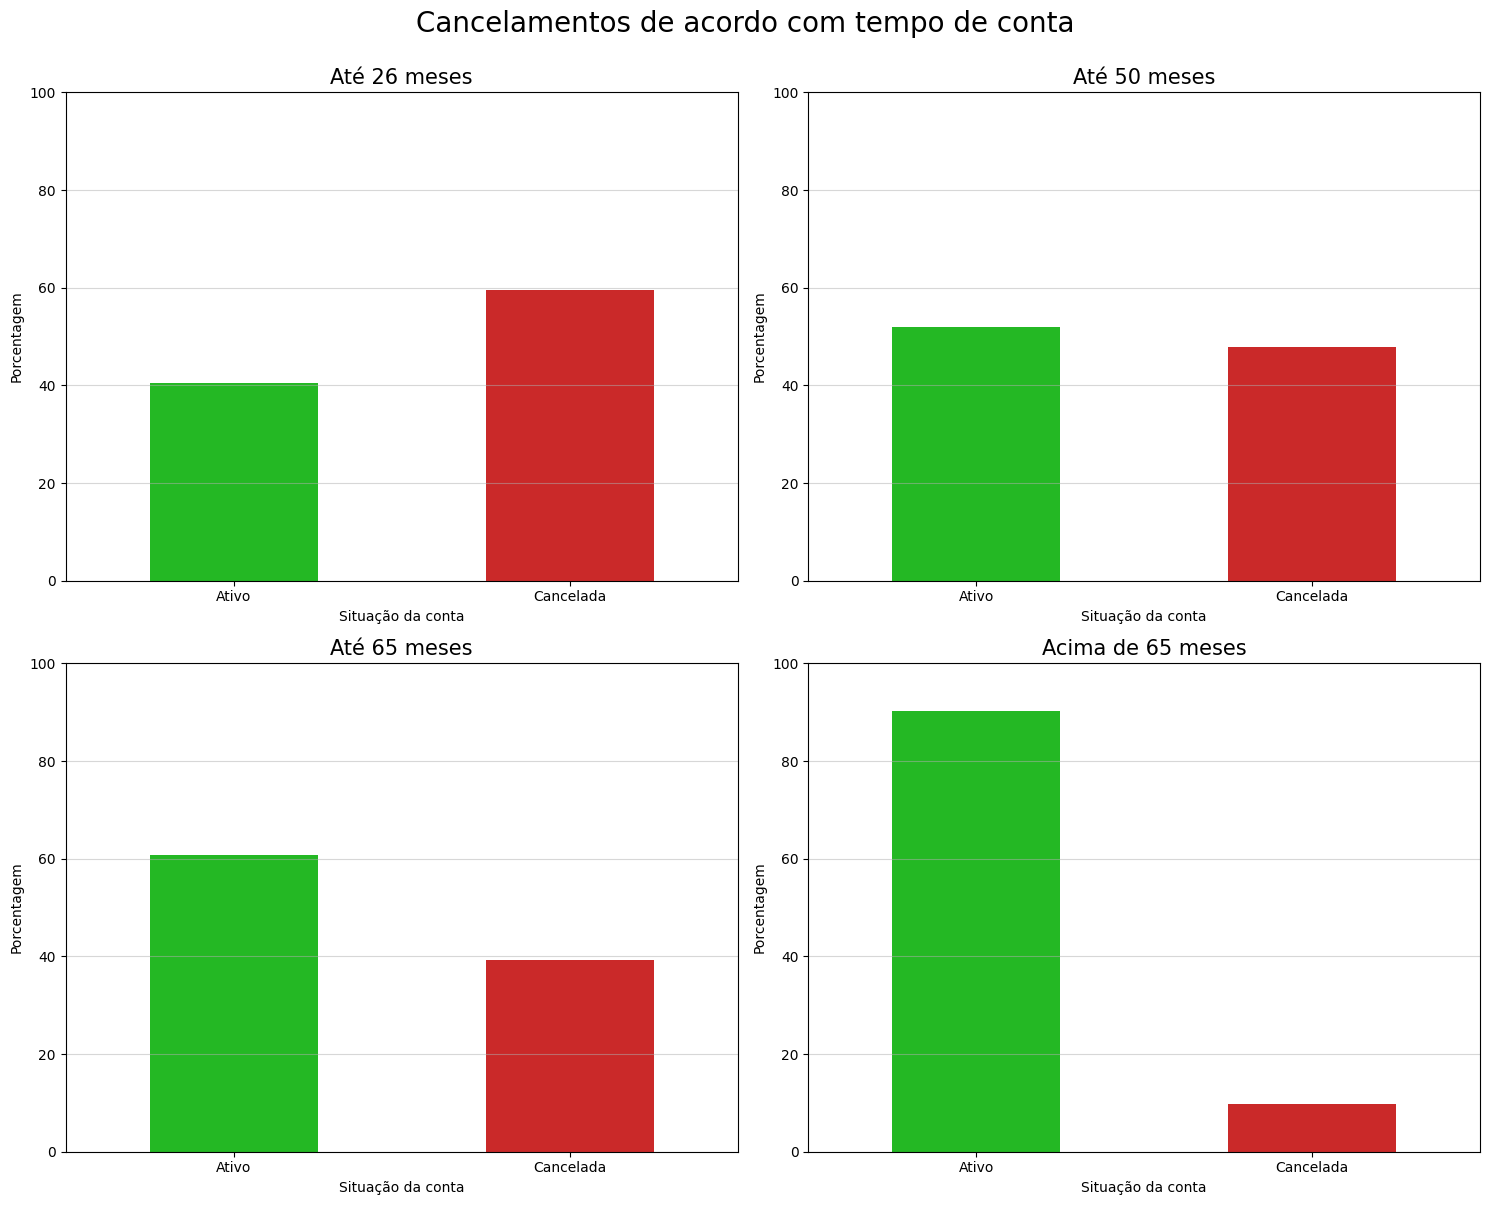

In [434]:
quantis = {
    'Até 26 meses': ternure_q1,
    'Até 50 meses': ternure_q2,
    'Até 65 meses': ternure_q3,
    'Acima de 65 meses': ternure_q4
}

posicoes = {
    'Até 26 meses': (0, 0),
    'Até 50 meses': (0, 1),
    'Até 65 meses': (1, 0),
    'Acima de 65 meses': (1, 1)
}

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
plt.suptitle("Cancelamentos de acordo com tempo de conta", fontsize=20, y=1)


for nome, dados in quantis.items():
    pos = posicoes[nome]
    soma_por_churn = dados.groupby('Churn')['ChargesMonthly'].sum()
    percentul_churn = soma_por_churn / soma_por_churn.sum() * 100
    # percentul_churn = percentul_churn.round(2)
    percentul_churn.plot(
        kind='bar',
        ax=axs[pos[0], pos[1]],
        color=["#24B824", "#CA2929"]
    )
    axs[pos[0], pos[1]].set_title(nome, fontsize=15)
    axs[pos[0], pos[1]].set_xticklabels(custom_labels_charge, rotation=0)
    axs[pos[0], pos[1]].set_xlabel('Situação da conta')
    axs[pos[0], pos[1]].set_ylabel('Porcentagem')
    axs[pos[0], pos[1]].grid(visible=True, alpha=0.5, axis='y')
    axs[pos[0], pos[1]].set_ylim(0, 100)
    

plt.tight_layout()
plt.show()


In [435]:
contract_df = pd.DataFrame(dados_completo.groupby('Contract')['Churn'].value_counts())
contract_df

count
Contract       Churn       
Month-to-month False   2220
               True    1655
One year       False   1306
               True     166
Two year       False   1637
               True      48

In [436]:
# 1. Reorganiza os dados: cada linha será um status de conta (Churn), colunas serão os gêneros
contract_pivot_df = contract_df['count'].unstack(level=0)
contract_pivot_df

Contract,Month-to-month,One year,Two year
Churn,,,
False,2220,1306,1637
True,1655,166,48


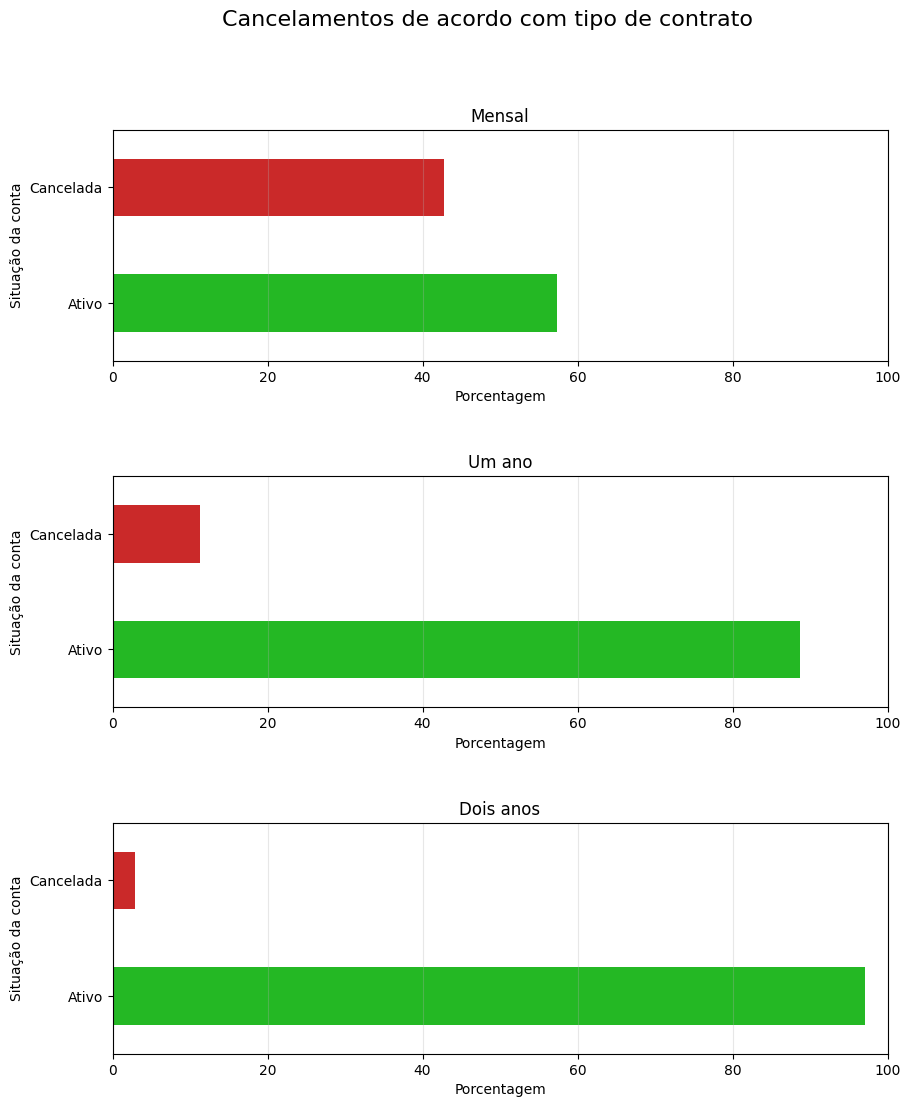

In [437]:
contract_titles = ['Mensal', 'Um ano', 'Dois anos']
contract_keys = ['Month-to-month', 'One year', 'Two year']
colors = ["#24B824", "#CA2929"]

fig, axs = plt.subplots(3, 1, figsize=(10, 12))
plt.suptitle("Cancelamentos de acordo com tipo de contrato", fontsize=16)

for i, key in enumerate(contract_keys):
    percent = contract_pivot_df[key] / contract_pivot_df[key].sum() * 100
    percent.plot(kind='barh', color=colors, ax=axs[i])

    axs[i].set_title(contract_titles[i])
    axs[i].set_yticklabels(custom_labels_charge, rotation=0)
    axs[i].set_ylabel('Situação da conta')
    axs[i].set_xlabel('Porcentagem')
    axs[i].grid(visible=True, alpha=0.3, axis='x')
    axs[i].set_xlim(0, 100)

plt.subplots_adjust(hspace=0.5)
plt.show()


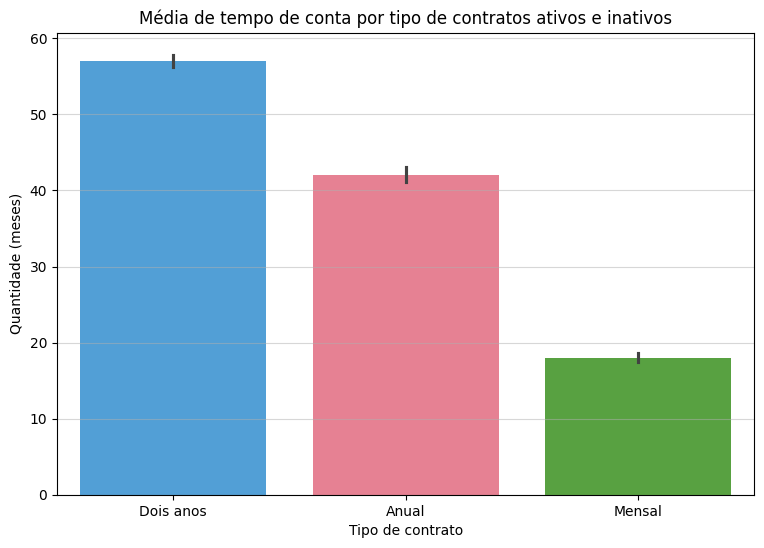

In [438]:
import seaborn as sns
ordem = dados_completo.groupby('Contract')['tenure'].mean().sort_values(ascending=False).index
labels_y = ['Mensal' if i == 'Month-to-month' else
            'Anual' if i == 'One year' else
            'Dois anos' if i == 'Two year' else i
            for i in ordem]

plt.figure(figsize=(9,6))

sns.barplot(x=dados_completo['Contract'], y=dados_completo['tenure'], order=ordem, hue=dados_completo['Contract'], palette='husl')
plt.xlabel('Tipo de contrato')
plt.ylabel('Quantidade (meses)')
plt.title('Média de tempo de conta por tipo de contratos ativos e inativos')
plt.grid(linestyle='-', axis='y', alpha=0.5)
plt.xticks(np.arange(3), labels=labels_y)


plt.show()


In [439]:
df_active_accounts = dados_completo.query('Churn == False')

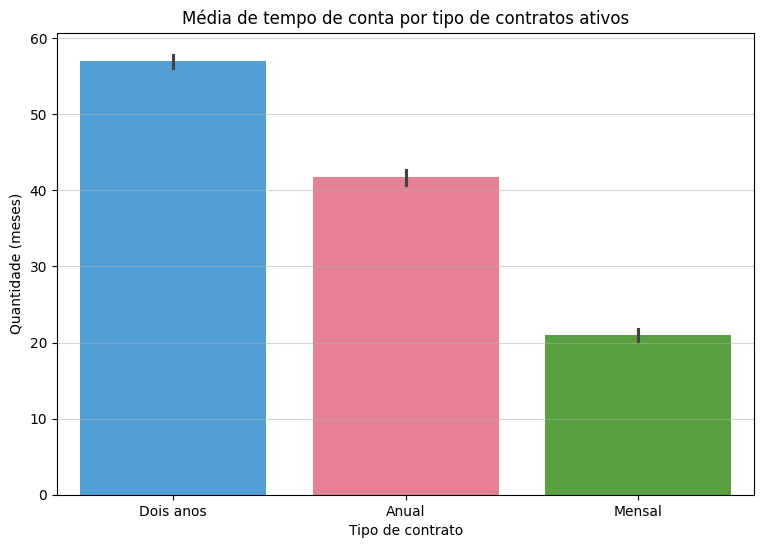

In [440]:
ordem = df_active_accounts.groupby('Contract')['tenure'].mean().sort_values(ascending=False).index
labels_y = ['Mensal' if i == 'Month-to-month' else
            'Anual' if i == 'One year' else
            'Dois anos' if i == 'Two year' else i
            for i in ordem]

plt.figure(figsize=(9,6))

sns.barplot(x=df_active_accounts['Contract'], y=df_active_accounts['tenure'], order=ordem, hue=df_active_accounts['Contract'], palette='husl')
plt.xlabel('Tipo de contrato')
plt.ylabel('Quantidade (meses)')
plt.title('Média de tempo de conta por tipo de contratos ativos')
plt.grid(linestyle='-', axis='y', alpha=0.5)
plt.xticks(np.arange(3), labels=labels_y)


plt.show()